# Management/Research question

  In the financial market there is lots of volatility, and predicting stock or index prices is key in making good trades for financial traders and account managers. In the following exercise we are tryin to build a Deep Neural Network model that will predict the prices of our S&P 500 index.


In [11]:
# Loading the basic libraries for RNN/LSTM

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split



%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['subtract', 'minimum', 'concatenate', 'average', 'add', 'dot', 'maximum', 'multiply']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
# Download the yahoo-finance S&P 500 index GSPC historical data 

import yfinance as yf
# Download Yahoo finance data
gspc_df = yf.download('^GSPC',
                      start='2017-03-03',
                      end='2022-03-03',
                      progress=False,
)


In [16]:
# Let's do some EDA 

print("Number of rows and columns:", gspc_df.shape)
gspc_df.head(5)



Number of rows and columns: (1259, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-03,2380.919922,2383.889893,2375.389893,2383.120117,2383.120117,3555260000
2017-03-06,2375.229980,2378.800049,2367.979980,2375.310059,2375.310059,3232700000
2017-03-07,2370.739990,2375.120117,2365.510010,2368.389893,2368.389893,3518390000
2017-03-08,2369.810059,2373.090088,2361.010010,2362.979980,2362.979980,3812100000
2017-03-09,2363.489990,2369.080078,2354.540039,2364.870117,2364.870117,3716340000


In [17]:
gspc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-03 to 2022-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [18]:
y = gspc_df["Close"]
x = gspc_df.drop("Close",1)


In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-03-03 to 2022-03-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Adj Close  1259 non-null   float64
 4   Volume     1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [20]:
y.head()

Date
2017-03-03    2383.120117
2017-03-06    2375.310059
2017-03-07    2368.389893
2017-03-08    2362.979980
2017-03-09    2364.870117
Name: Close, dtype: float64

(array([150., 249., 314., 120.,  93.,  47.,  55.,  61., 108.,  62.]),
 array([2237.39990234, 2493.31591797, 2749.23193359, 3005.14794922,
        3261.06396484, 3516.97998047, 3772.89599609, 4028.81201172,
        4284.72802734, 4540.64404297, 4796.56005859]),
 <BarContainer object of 10 artists>)

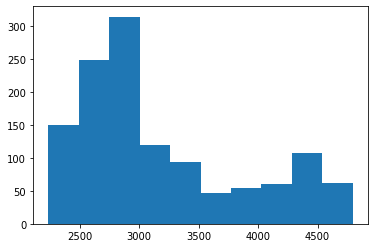

In [22]:
# Let us plot the Histogram of Closing prices 
hist(y)

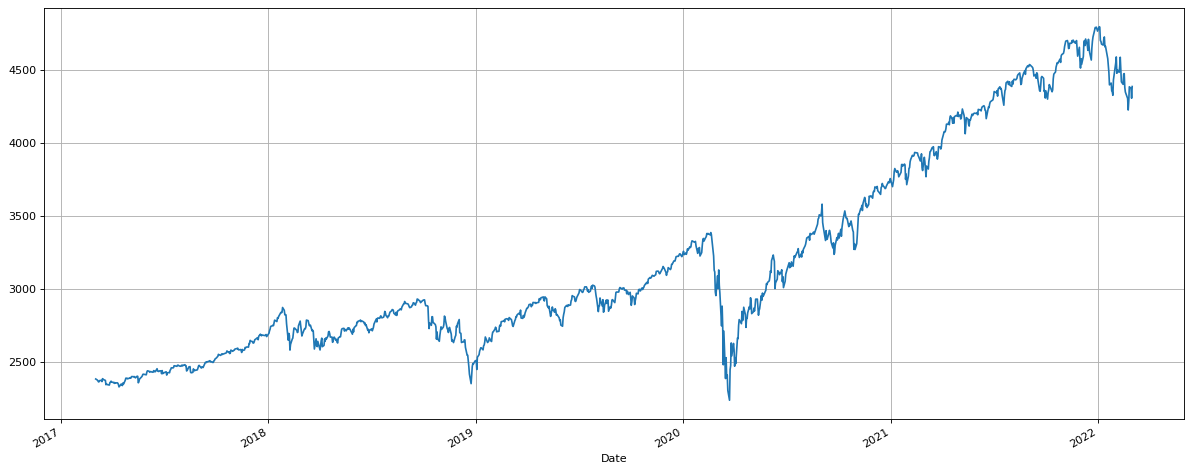

In [74]:
# Let us plot the Closing prices

# Visualization of data. Plotting.
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y.plot()
plt.tight_layout()
plt.grid()
plt.show()


Let us Load the Kaggle Leaf data set. This is about identifying various leaves in the forest.

Loading the training and test data from Kaggle 

In [36]:
# Split the Dataset , train and test , 1000, 250, will give us 80/20 Split 
training_set = gspc_df.iloc[:800, 1:2].values
test_set = gspc_df.iloc[800:, 1:2].values


In [37]:
# Let's Scale the Data

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
X_train.shape

(740, 60, 1)

In [39]:
pd.DataFrame(data=training_set).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       800 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [40]:
pd.DataFrame(data=test_set).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       459 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [42]:
# Let us build our first LSTM Model for predicting prices

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 8s 82ms/step - loss: 0.0530
Epoch 2/100
24/24 [==============================] - 2s 77ms/step - loss: 0.0150
Epoch 3/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0129
Epoch 4/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0115
Epoch 5/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0105
Epoch 6/100
24/24 [==============================] - 2s 84ms/step - loss: 0.0097
Epoch 7/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0086
Epoch 8/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0068
Epoch 9/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0099
Epoch 10/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0067
Epoch 11/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0065
Epoch 12/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0060
Epoch 13/100
24/24 [===

24/24 [==============================] - 2s 100ms/step - loss: 0.0023


In [43]:
# Reshape the test data

dataset_train = gspc_df.iloc[:800, 1:2]
dataset_test = gspc_df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [72]:
# Predict prices

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [73]:

newdf = gspc_df.reset_index()

newdf['Date']

newdf.head()




,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-03,2380.919922,2383.889893,2375.389893,2383.120117,2383.120117,3555260000
1,2017-03-06,2375.229980,2378.800049,2367.979980,2375.310059,2375.310059,3232700000
2,2017-03-07,2370.739990,2375.120117,2365.510010,2368.389893,2368.389893,3518390000
3,2017-03-08,2369.810059,2373.090088,2361.010010,2362.979980,2362.979980,3812100000
4,2017-03-09,2363.489990,2369.080078,2354.540039,2364.870117,2364.870117,3716340000


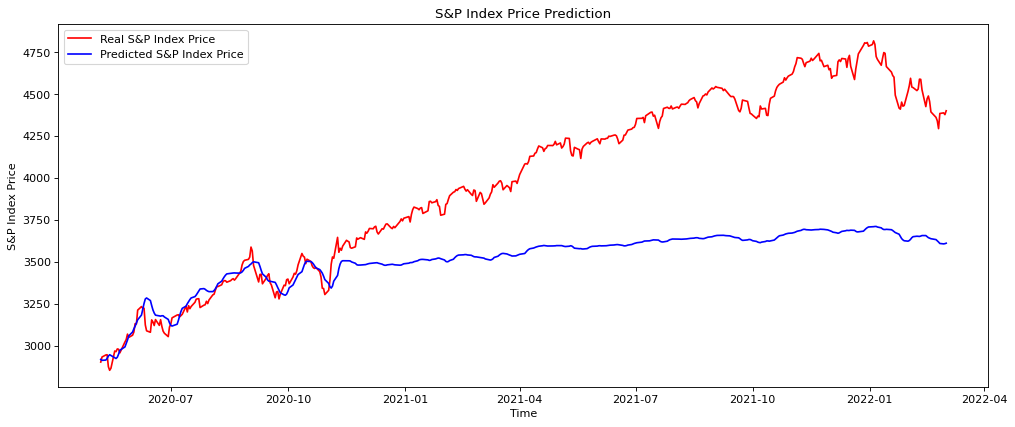

In [77]:
# Plotting the predicted prices against the real prices, to see how we did in the predictions
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(newdf.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real S&P Index Price')
plt.plot(newdf.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted S&P Index Price')
#plt.xticks(np.arange(0,459,50))
plt.title('S&P Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Index Price')
plt.legend()
plt.show()


This model started well but diverged heavily later.
The predicted value diverge from 2020 October end , it seems. 
Let us see the real prices one more time and may be guess why


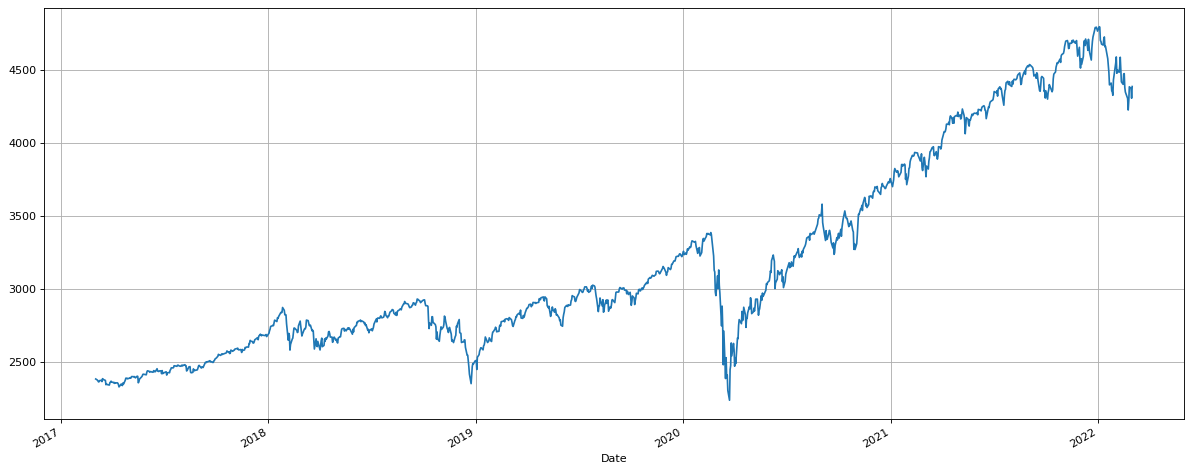

In [78]:
# Visualization real S&P prices 
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y.plot()
plt.tight_layout()
plt.grid()
plt.show()


It seems the prices went up and were up in a upwards trajectory after 2020 OCt.
Before that the prices were fluctuation and were not that high either. They were around 2500-2800 range.
After 2020, then prices went up and up are at 4700 range. 
This is likely due to the covid-19, stimulus etc.
Let us try a LSTM model with less units and observe the results.

In [94]:
# LSTM Model 2 with Early stopping  

from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau




model_2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 20, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 10, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 10))
model_2.add(Dropout(0.2))
# Adding the output layer
model_2.add(Dense(units = 1))

#keras.layers.GRU(20, return_sequences=True)

#sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
#model.compile(optimizer = sgd, loss = 'mean_squared_error')

model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')


cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_loss')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_loss')


# Fit the Model with Early Stopping 
history = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64, callbacks = [cb1, cb2], verbose = 1)



# Fitting the RNN to the Training set
#model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
10/10 [==============================] - 10s 238ms/step - loss: 0.1525 - val_loss: 0.2760 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 1s 86ms/step - loss: 0.0416 - val_loss: 0.0716 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 1s 96ms/step - loss: 0.0278 - val_loss: 0.0821 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 1s 92ms/step - loss: 0.0225 - val_loss: 0.1029 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 1s 83ms/step - loss: 0.0175 - val_loss: 0.0699 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 1s 94ms/step - loss: 0.0162 - val_loss: 0.0671 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 1s 94ms/step - loss: 0.0144 - val_loss: 0.0503 - lr: 0.0010
Epoch 8/100
10/10 [==============================] - 1s 107ms/step - loss: 0.0103 - val_loss: 0.0459 - lr: 0.0010
Epoch 9/100
10/10 [==============================] - 1s 128ms/step - loss: 0.0130 - val_loss:

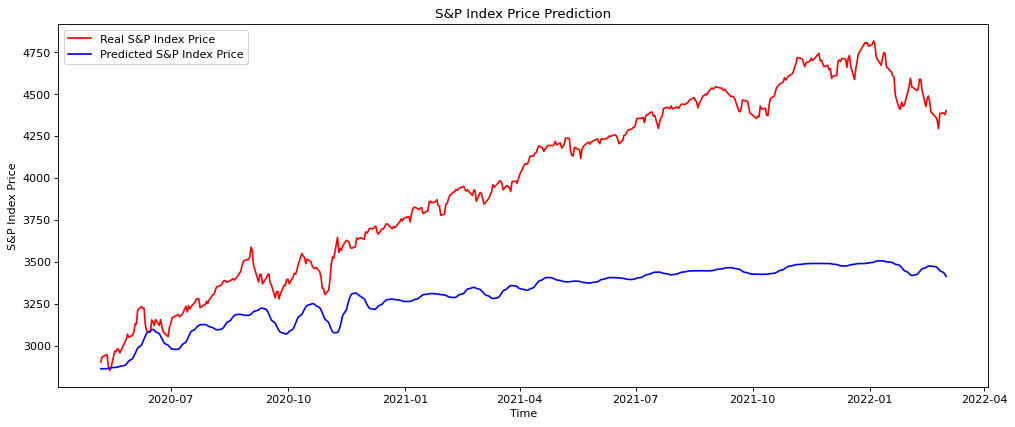

In [80]:

# Predicting and Plotting the predicted prices against the real prices, to see how we did in the predictions


predicted_stock_price = model_2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(newdf.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real S&P Index Price')
plt.plot(newdf.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted S&P Index Price')
#plt.xticks(np.arange(0,459,50))
plt.title('S&P Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Index Price')
plt.legend()
plt.show()




This model didn't do as well either, dues to less units the initial diverged, but the later did not come close.


In [98]:

# Let us build Model 3 

model_3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_3.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 80, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 80, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 80))
model_3.add(Dropout(0.2))
# Adding the output layer
model_3.add(Dense(units = 1))

# Compiling the RNN
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_loss')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_loss')


# Fit the Model with Early Stopping 
history = model_3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks = [cb1, cb2], verbose = 1)


# Fitting the RNN to the Training set
#model_3.fit(X_train, y_train, epochs = 100, batch_size = 32)





Epoch 1/100
19/19 [==============================] - 10s 204ms/step - loss: 0.0232 - val_loss: 0.0570 - lr: 0.0010
Epoch 2/100
19/19 [==============================] - 2s 124ms/step - loss: 0.0076 - val_loss: 0.0327 - lr: 0.0010
Epoch 3/100
19/19 [==============================] - 2s 125ms/step - loss: 0.0050 - val_loss: 0.0323 - lr: 0.0010
Epoch 4/100
19/19 [==============================] - 3s 133ms/step - loss: 0.0047 - val_loss: 0.0302 - lr: 0.0010
Epoch 5/100
19/19 [==============================] - 3s 160ms/step - loss: 0.0048 - val_loss: 0.0297 - lr: 0.0010
Epoch 6/100
19/19 [==============================] - 3s 166ms/step - loss: 0.0045 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/100
19/19 [==============================] - 3s 146ms/step - loss: 0.0040 - val_loss: 0.0253 - lr: 0.0010
Epoch 8/100
19/19 [==============================] - 3s 143ms/step - loss: 0.0039 - val_loss: 0.0241 - lr: 0.0010
Epoch 9/100
19/19 [==============================] - 3s 144ms/step - loss: 0.0042 - val

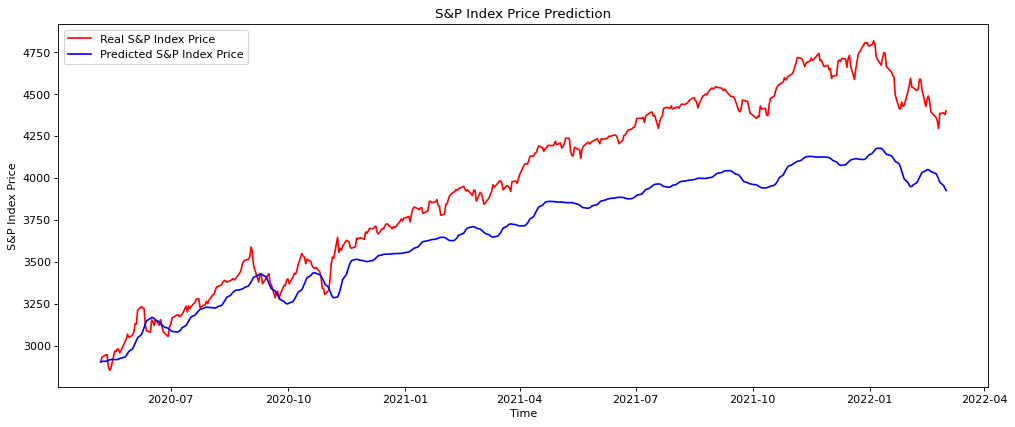

In [99]:
# Let's predict the Index prices, and plot it against the real price series

predicted_stock_price = model_3.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(newdf.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real S&P Index Price')
plt.plot(newdf.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted S&P Index Price')
#plt.xticks(np.arange(0,459,50))
plt.title('S&P Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Index Price')
plt.legend()
plt.show()

In [100]:
# Building Model 4 

model_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 120, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 120, return_sequences = True))
model_4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 120, return_sequences = True))
model_4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 120))
model_4.add(Dropout(0.2))
# Adding the output layer
model_4.add(Dense(units = 1))

# Compiling the RNN
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

cb1 = EarlyStopping(patience = 3, restore_best_weights=True, monitor = 'val_loss')
cb2 = ReduceLROnPlateau(patience = 4, min_lr=0.00001, factor = 0.4, monitor = 'val_loss')


# Fit the Model with Early Stopping 
history = model_4.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks = [cb1, cb2], verbose = 1)



Epoch 1/100
19/19 [==============================] - 10s 231ms/step - loss: 0.0421 - val_loss: 0.0381 - lr: 0.0010
Epoch 2/100
19/19 [==============================] - 3s 162ms/step - loss: 0.0088 - val_loss: 0.0470 - lr: 0.0010
Epoch 3/100
19/19 [==============================] - 3s 171ms/step - loss: 0.0053 - val_loss: 0.0324 - lr: 0.0010
Epoch 4/100
19/19 [==============================] - 3s 183ms/step - loss: 0.0046 - val_loss: 0.0298 - lr: 0.0010
Epoch 5/100
19/19 [==============================] - 3s 179ms/step - loss: 0.0041 - val_loss: 0.0299 - lr: 0.0010
Epoch 6/100
19/19 [==============================] - 3s 180ms/step - loss: 0.0039 - val_loss: 0.0279 - lr: 0.0010
Epoch 7/100
19/19 [==============================] - 3s 184ms/step - loss: 0.0037 - val_loss: 0.0263 - lr: 0.0010
Epoch 8/100
19/19 [==============================] - 4s 186ms/step - loss: 0.0036 - val_loss: 0.0263 - lr: 0.0010
Epoch 9/100
19/19 [==============================] - 3s 184ms/step - loss: 0.0039 - val

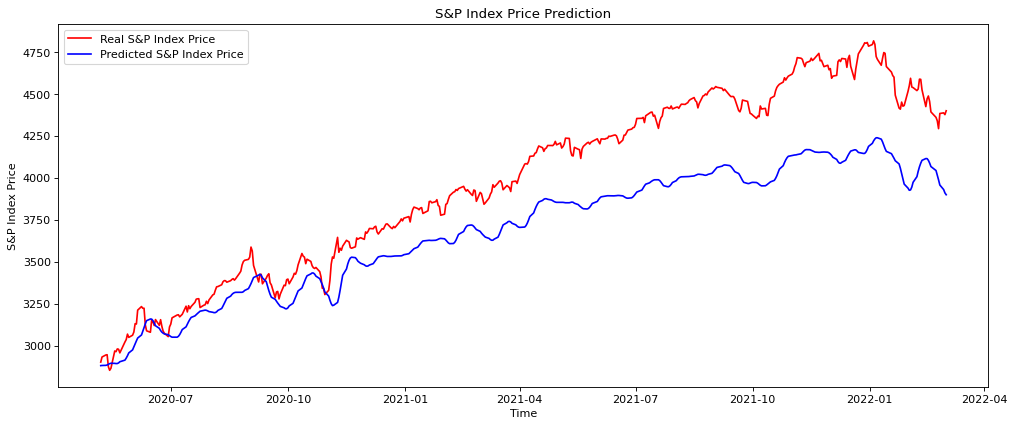

In [101]:
# Let's predict the Index prices, and plot it against the real price series

predicted_stock_price = model_4.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(newdf.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real S&P Index Price')
plt.plot(newdf.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted S&P Index Price')
#plt.xticks(np.arange(0,459,50))
plt.title('S&P Index Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Index Price')
plt.legend()
plt.show()


# S&P 500 Index Models Summary
  Here I have developed 4 RNN LSTM models to predict the S&P 500 index prices. I tried with a basic model with 4 LSTM layers, and when the O/P was plotted against the real prices, seems the plots diverged after 2020 Mic Oct. Looking at the real prices series plot, it showed after 2020, the index prices got a sharp gradient increase, and the prices have gone continuously, thus the gap. I tried to reduce the units, but that didn't help.
  In the next two models as we increase the LSTM units to 80 and 120, seems we are getting much better results.
  The predicted price sries is following real price series very closely, all the trends with one day lag. So I think if we increase the LSTM units more and add some regularization tuning to avoid over fitting, it is going to be very close. These trainings require lots of CPU/GPU power though.
  
  

